<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/SARIMA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 562 kB/s 


In [4]:
import yfinance as yf
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
2022-11-29,16217.639648,16522.257812,16139.396484,16444.982422,16444.982422,23581685468


In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objs as go
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')

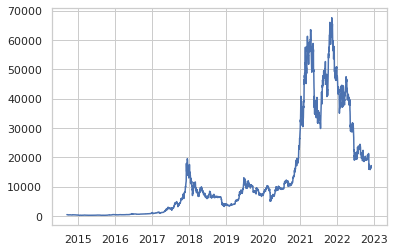

In [7]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [8]:
to_row=int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

In [9]:
model_predictions = []
n_test_obser=len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = SARIMAX(training_data, order = (4,1,0),seasonal_order=(1,1,0,12))
  model_fit= model.fit()
  output = model_fit.forecast()
  y_pred=list(output)[0]
  model_predictions.append(y_pred)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range=df[to_row:].index
plt.plot( model_predictions, color="blue",marker="o",linestyle="dashed",label="BTC predicted price")
plt.plot(testing_data,color="red",label="BTC Actual Price")

plt.title("Bitcoin Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mape=np.mean(np.abs(np.array(model_predictions[:])-np.array(testing_data))/np.abs(testing_data))
print(str(mape))